# Lab_Hypothesis_Testing
It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. 
In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with
a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!)from the regular population?

Set up the hypothesis test.
Write down all the steps followed for setting up the test.
Calculate the test statistic by hand and also code it in Python. It should be 4.76190. What decision can you make based on this calculated value?

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Testing means (with 1 sample)
Is the group significantly different (with respect to systolic blood pressure!)from the regular population? :(

H0: mu=130.1
H1: mu ≠ 130.1

In [3]:
np.random.seed(42)

r1 = stats.expon.rvs(size=500, loc = 0.15, scale = 3 )
r2 =stats.norm.rvs(size=500,loc=2,scale = 0.45)
pop = pd.Series(np.concatenate([r1,r2]))
samp_size = 80 # 80 > 30 -> Normal distribution.
pop

0      1.557804
1      9.180364
2      4.100237
3      2.888828
4      0.658875
         ...   
995    1.761109
996    1.779752
997    2.469872
998    2.306851
999    2.831018
Length: 1000, dtype: float64

<AxesSubplot:>

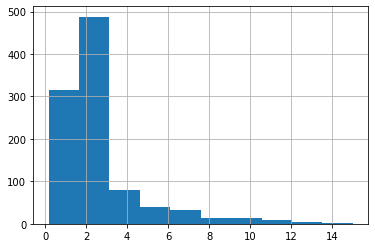

In [4]:
pop.hist()

<AxesSubplot:>

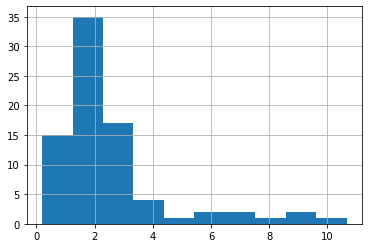

In [6]:
systolic_bp = pop.sample(samp_size)
systolic_bp.hist()

<AxesSubplot:>

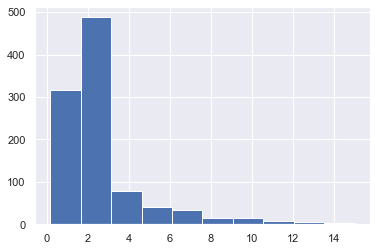

In [7]:
sns.set_theme()
pop.hist()

In [8]:
# Honolulu Heart Study say that systolic blood pressure on average 130.1 mm Hg 
# The mean of our sample, however, is:
systolic_bp_mean = systolic_bp.mean()
print("Sample mean of systolic_bp: {:.2f}".format(systolic_bp_mean))

Sample mean of systolic_bp: 2.50


In [9]:
# Let's compute the standard error:
sem = np.std(pop)/np.sqrt(samp_size)
sem

0.24236539064525733

#z distribution is a standard normal distribution

In [10]:
z = (systolic_bp_mean-2)/sem
print("The z score of our sample is: {:.2f}".format(z))

The z score of our sample is: 2.08


#fixed confidence level to 95% which is the same as saying 

#Now we need to find out for which value on the x axis of a normal distribution we get 0.95 of the total area.

In [11]:
zc = stats.norm.ppf(0.95) # 0.95 is the confidence level.
print("The critical value corresponding to a 0.95 area of a normal distribution is: {:.2f}".format(zc))

The critical value corresponding to a 0.95 area of a normal distribution is: 1.64


#Using a higher confindence level. Set it to 98%.

In [12]:
zc = stats.norm.ppf(0.98)
print("The critical value corresponding to a 0.95 area of a normal distribution is: {:.2f}".format(zc))

The critical value corresponding to a 0.95 area of a normal distribution is: 2.05


#Set the confidence level to 0.999

In [14]:
zc = stats.norm.ppf(0.999)
print("The critical value corresponding to a 0.95 area of a normal distribution is: {:.2f}".format(zc))

The critical value corresponding to a 0.95 area of a normal distribution is: 3.09


In [19]:
n = 100 # 100 > 30 -> Normal distribution
# Ho: \mu = 130.1
# H1: mean ≠ 130.1

sample_mean = 120
pop_mean = 130.1
pop_std_dev = 21.21

In [20]:
z = ( sample_mean - pop_mean ) / ( pop_std_dev / np.sqrt(100) )
print("Our z score is: {:.2f}".format(z))

Our z score is: -4.76


#Let's set the confidence level to 95% = 0.95

#Two sided: Ha: μ ≠ 120 mm Hg

In [21]:
zc = stats.norm.ppf(1-(0.05/2))
print("Our zc score is: {:.2f}".format(zc))

Our zc score is: 1.96


# conculsion: we reject the null hypothesis. average systolic blood pressure is not eqauls to 120 mm Hg